In [12]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import shutil

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [8]:
# 🔹 Load Cats vs Dogs dataset
import tensorflow_datasets as tfds
import tensorflow as tf
import math

# Dataset constants
IMG_SIZE = 150
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# Load dataset (80% train, 20% validation)
(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,  # returns (image, label)
    with_info=True
)

# 🔹 Preprocessing + Augmentation for training
def preprocess_and_augment(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    # Data augmentation
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    image = image / 255.0
    return image, label

# 🔹 Preprocessing for validation (no augmentation)
def preprocess_only(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

# 🔹 Prepare datasets for training
train_ds = (train_ds
            .map(preprocess_and_augment, num_parallel_calls=AUTOTUNE)
            .shuffle(1000)
            .batch(BATCH_SIZE)
            .cache()
            .prefetch(AUTOTUNE))

val_ds = (val_ds
          .map(preprocess_only, num_parallel_calls=AUTOTUNE)
          .batch(BATCH_SIZE)
          .cache()
          .prefetch(AUTOTUNE))

# 🔹 Print dataset info and batch counts
num_train_batches = math.ceil(ds_info.splits['train'].num_examples * 0.8 / BATCH_SIZE)
num_val_batches = math.ceil(ds_info.splits['train'].num_examples * 0.2 / BATCH_SIZE)

print(ds_info)
print("Training batches:", num_train_batches)
print("Validation batches:", num_val_batches)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.SUK2I1_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings 

In [13]:
import tensorflow_datasets as tfds

(train_ds, val_ds), info = tfds.load(
    "cats_vs_dogs",
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Number of classes
num_classes = info.features["label"].num_classes
print("Number of classes:", num_classes)

# Dataset sizes
print("Training examples:", info.splits['train'].num_examples * 0.8)
print("Validation examples:", info.splits['train'].num_examples * 0.2)

# Inspect few samples
for image, label in train_ds.take(2):
    print("Image shape:", image.shape, "Label:", label.numpy())

print("Class names:", info.features["label"].names)


Number of classes: 2
Training examples: 18609.600000000002
Validation examples: 4652.400000000001
Image shape: (262, 350, 3) Label: 1
Image shape: (409, 336, 3) Label: 1
Class names: ['cat', 'dog']


In [14]:
import tensorflow as tf

IMG_SIZE = 150
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# 🔹 Training preprocessing + augmentation
def preprocess_and_augment(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image, label

# 🔹 Validation preprocessing (no augmentation)
def preprocess_only(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# 🔹 Apply preprocessing
train_ds_aug = (
    train_ds
    .map(preprocess_and_augment, num_parallel_calls=AUTOTUNE)
    .shuffle(1000)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(AUTOTUNE)
)

val_ds_preprocessed = (
    val_ds
    .map(preprocess_only, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(AUTOTUNE)
)

In [15]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
import tensorflow as tf

# Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.keras',
        monitor='val_loss',
        save_best_only=True
    ),
    reduce_lr
]

In [17]:
history = model.fit(
    train_ds_aug,
    validation_data=val_ds_preprocessed,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.5427 - loss: 0.7342 - val_accuracy: 0.6955 - val_loss: 0.5919 - learning_rate: 0.0010
Epoch 2/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - accuracy: 0.7034 - loss: 0.5758 - val_accuracy: 0.7765 - val_loss: 0.4732 - learning_rate: 0.0010
Epoch 3/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.7756 - loss: 0.4763 - val_accuracy: 0.7877 - val_loss: 0.4414 - learning_rate: 0.0010
Epoch 4/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.8044 - loss: 0.4271 - val_accuracy: 0.8101 - val_loss: 0.3999 - learning_rate: 0.0010
Epoch 5/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.8303 - loss: 0.3824 - val_accuracy: 0.8239 - val_loss: 0.3995 - learning_rate: 0.0010
Epoch 6/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.8505 - loss: 0.3416 - val_accuracy: 0.8319 - val_loss: 0.3743 - learning_rate: 0.0010
Epoch 7/20
581/581 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.8690 - l

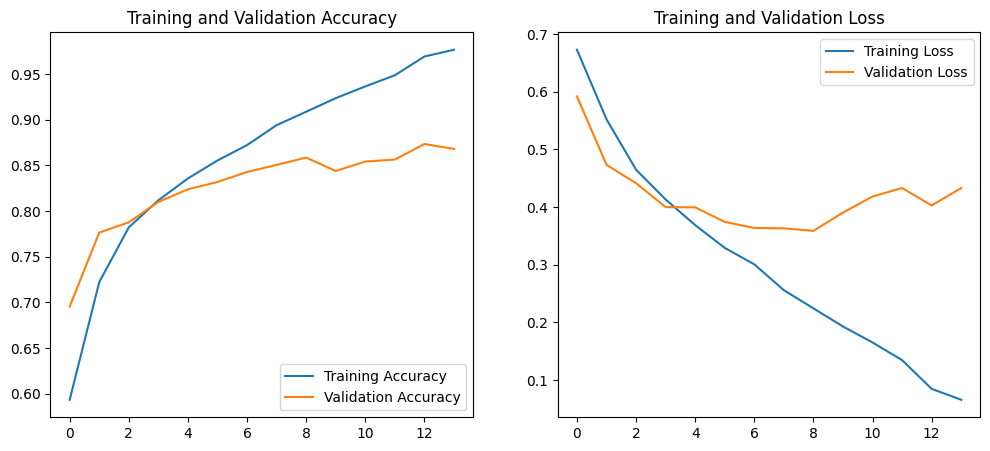

In [18]:
# Plot training & validation accuracy and loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


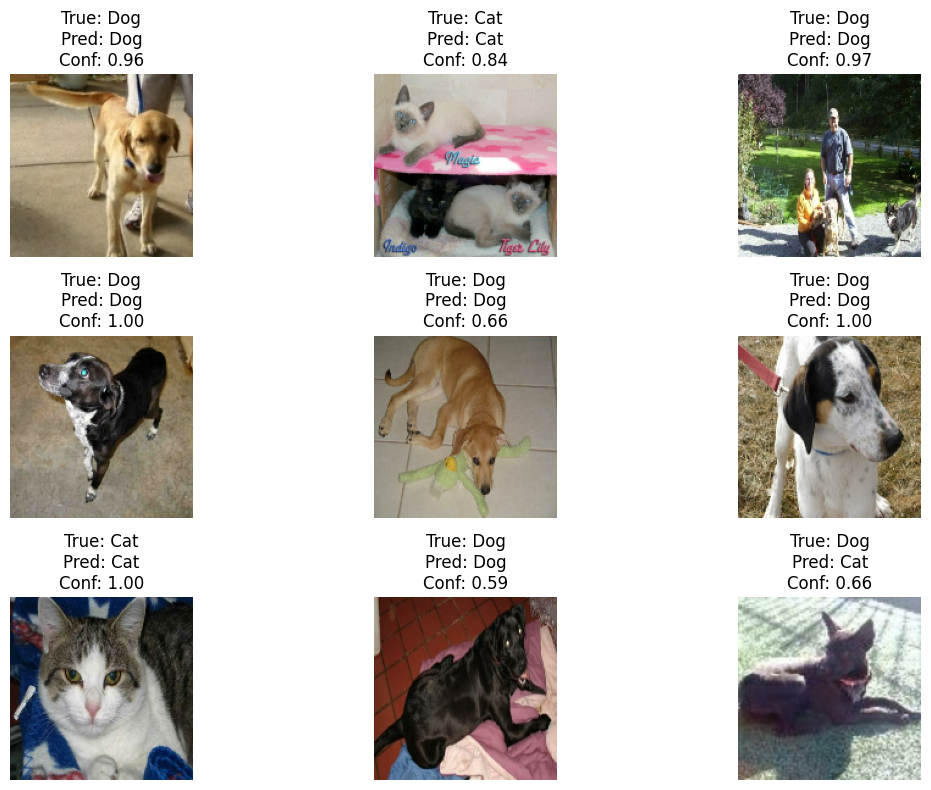

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch from validation dataset
for images, labels in val_ds_preprocessed.take(1):
    break

# Make predictions
predictions = model.predict(images)

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)

    img = images[i]
    label = labels[i].numpy()

    pred_prob = predictions[i][0]  # Probability of class 1 (Dog)
    pred_label = 1 if pred_prob > 0.5 else 0

    plt.imshow(img.numpy())
    plt.axis('off')

    true_class = "Dog" if label == 1 else "Cat"
    predicted_class = "Dog" if pred_label == 1 else "Cat"

    confidence = pred_prob if pred_label == 1 else 1 - pred_prob

    plt.title(f"True: {true_class}\nPred: {predicted_class}\nConf: {confidence:.2f}")

plt.tight_layout()
plt.show()

# Save final trained model
model.save("cats_vs_dogs_cnn_model.keras")

In [20]:
model.save("cats_vs_dogs_cnn_model.keras")

Saving pexels-pixabay-104827.jpg to pexels-pixabay-104827.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


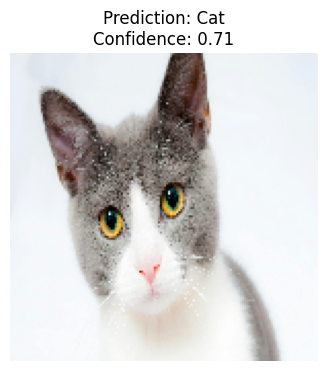

In [21]:
# 🔹 Upload an image and predict Cat or Dog
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load model if not in memory
try:
    model
except NameError:
    from tensorflow.keras.models import load_model
    model = load_model("cats_vs_dogs_cnn_model.keras")

# Upload image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    pred_prob = model.predict(img_array)[0][0]
    pred_label = "Dog" if pred_prob > 0.5 else "Cat"
    confidence = pred_prob if pred_label == "Dog" else 1 - pred_prob

    # Display image and prediction
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {pred_label}\nConfidence: {confidence:.2f}")
    plt.show()

Saving pexels-summerstock-333083.jpg to pexels-summerstock-333083.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


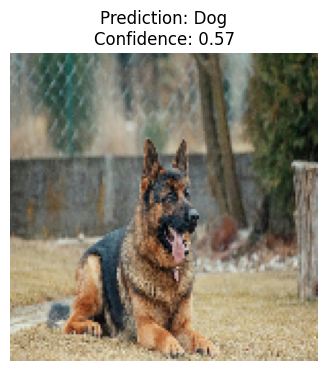

In [22]:
# 🔹 Upload an image and predict Cat or Dog
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load model if not in memory
try:
    model
except NameError:
    from tensorflow.keras.models import load_model
    model = load_model("cats_vs_dogs_cnn_model.keras")

# Upload image
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    pred_prob = model.predict(img_array)[0][0]
    pred_label = "Dog" if pred_prob > 0.5 else "Cat"
    confidence = pred_prob if pred_label == "Dog" else 1 - pred_prob

    # Display image and prediction
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {pred_label}\nConfidence: {confidence:.2f}")
    plt.show()